# House price Prediction
In this notebook I tried to bring detailed data analysis and some simple yet complex regression techniques. I hope you guys enjoy my analysis here.

In the first few cells I imported all necessary libraies and explored our train and test dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
training_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House Prices/train.csv')
testing_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House Prices/test.csv')
training_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
training_dataset.shape

(1460, 81)

In [5]:
training_dataset.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


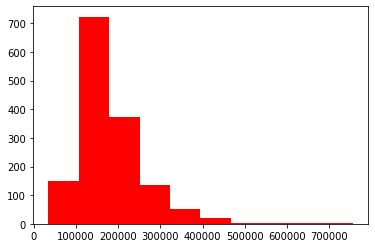

In [6]:
plt.hist(training_dataset.SalePrice,color='Red')
plt.show()

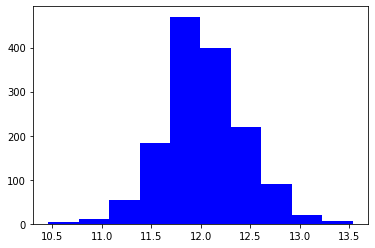

In [7]:
target =np.log(training_dataset.SalePrice)
plt.hist(target,color='Blue')
plt.show()

In [8]:
numeric_features=training_dataset.select_dtypes(include=[np.number])
numeric_features.dtypes


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [9]:
corr=numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:],'\n')


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



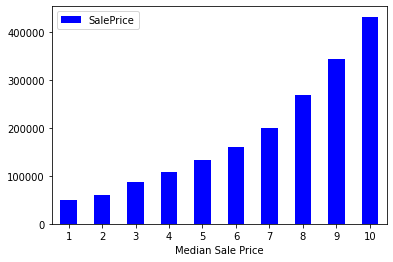

In [10]:
quality_pivot=training_dataset.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')

plt.xlabel('Overall Quality')
plt.xlabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()



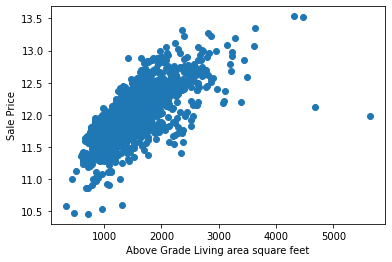

In [11]:
plt.scatter(x=training_dataset['GrLivArea'], y=np.log(training_dataset['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('Above Grade Living area square feet')

plt.show()


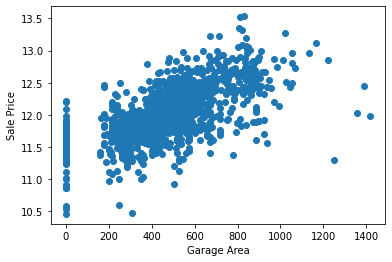

In [12]:
plt.scatter(x=training_dataset['GarageArea'], y=np.log(training_dataset['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

plt.show()


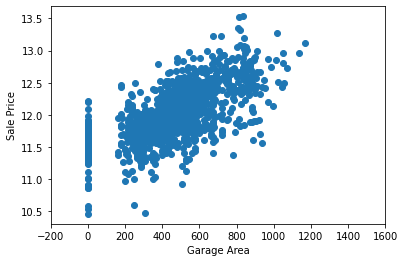

In [13]:
training_dataset=training_dataset[training_dataset['GarageArea']< 1200]

plt.scatter(x=training_dataset['GarageArea'], y=np.log(training_dataset.SalePrice))

plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

plt.show()



In [14]:
nulls=pd.DataFrame(training_dataset.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=['Null Count']
nulls.index.name='Feature'
nulls


,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageYrBlt,81
GarageCond,81
GarageType,81


In [15]:
categoricals=training_dataset.select_dtypes(exclude=[np.number])

categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [19]:
training_dataset['enc_street']=pd.get_dummies(training_dataset.Street,drop_first=True)
testing_dataset['enc_street']=pd.get_dummies(testing_dataset.Street,drop_first=True)
print('Encoded:\n')
print(training_dataset.enc_street.value_counts())





Encoded:

1    1450
0       5
Name: enc_street, dtype: int64


In [20]:
data= training_dataset.select_dtypes(include=[np.number]).interpolate().dropna()

sum(data.isnull().sum()!=0)


0

In [21]:
y=np.log(training_dataset.SalePrice)
X=data.drop(['SalePrice', 'Id'],axis=1)



In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=44, shuffle =True)

In [26]:
from sklearn.linear_model import LinearRegression

LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

Linear Regression Train Score is :  0.8880914061806215
Linear Regression Test Score is :  0.9025541561237912
Linear Regression Coef is :  [-2.85163657e-04  3.86604468e-04  2.51038285e-06  7.46477524e-02
  5.13772221e-02  2.99516776e-03  1.14048567e-03 -1.49295325e-05
  6.62503981e-05  3.14831020e-05  1.00933968e-06  9.87428398e-05
  1.02717496e-04  7.80760167e-05 -5.12931196e-05  1.29500393e-04
  3.95387365e-02 -2.78263306e-05  1.83096537e-02  2.31511900e-02
 -1.62407247e-03 -8.48462817e-02  1.42645604e-02  4.06417207e-02
  8.17344251e-05  3.50723550e-02  1.15167260e-04  6.61403151e-05
 -6.01164332e-05  1.16395149e-04  2.17116556e-04  2.12633081e-04
 -1.41624925e-05 -5.56073289e-06 -7.97987411e-04 -5.03926316e-03
  2.05801954e-01]
Linear Regression intercept is :  12.152168904241412


In [27]:
y_pred_linear = LinearRegressionModel.predict(X_test)
print('Y predict: ',y_pred_linear[:5])
print('Y test: ', y_test[:5])

Y predict:  [12.50587515 11.79765668 12.16392653 11.97663076 12.04704568]
Y test:  621     12.388394
1453    11.344507
315     12.146853
563     12.128111
404     12.031719
Name: SalePrice, dtype: float64


In [28]:
from sklearn.metrics import mean_squared_error
print('root square error is',LinearRegressionModel.score(X_test, y_test))
predictions=LinearRegressionModel.predict(X_test)

print('RMSE', mean_squared_error(y_test, predictions))




root square error is 0.9025541561237912
RMSE 0.014558518501261476


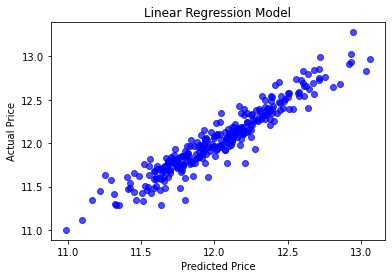

In [29]:
actual_values=y_test
plt.scatter(predictions, actual_values,alpha=.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

plt.show()



